# problem definition, Data Cleaning ,Exploratory data analysis and data preprocessing

In [ ]:
impo

In [184]:
data=pd.read_csv("D:\graduation project data\heart_2020_cleaned.csv")

In [183]:
import pandas as pd
import seaborn as sns
import numpy  as np
from sklearn.datasets import make_classification
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegressionCV
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn import svm
from sklearn.utils import shuffle
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier


In [185]:
data.head()


,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


checking missing values

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

In [37]:
data["HeartDisease"].value_counts(normalize=True)

No     0.914405
Yes    0.085595
Name: HeartDisease, dtype: float64

In [35]:
data.duplicated().sum()

18078

In [38]:
dubdata=data.duplicated()
data[dubdata]["HeartDisease"].value_counts(normalize=True)

No     0.993805
Yes    0.006195
Name: HeartDisease, dtype: float64

In [39]:
data.drop_duplicates(inplace=True)

In [40]:
data.duplicated().sum()

0

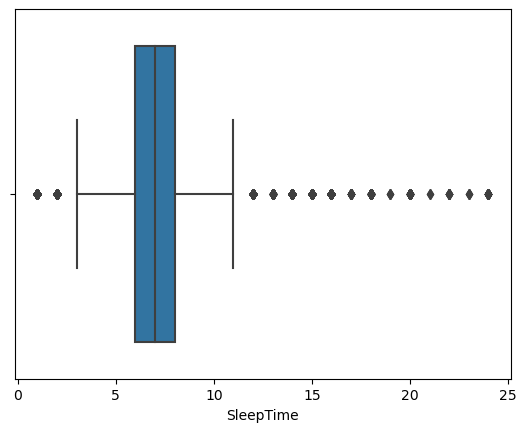

In [61]:

sns.boxplot(x=data["SleepTime"])
plt.show()

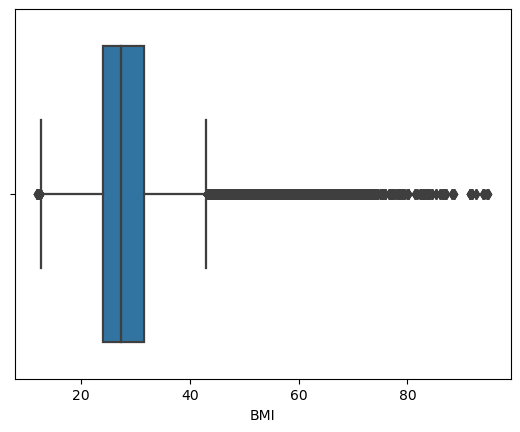

In [64]:
sns.boxplot(x=data["BMI"])
plt.show()

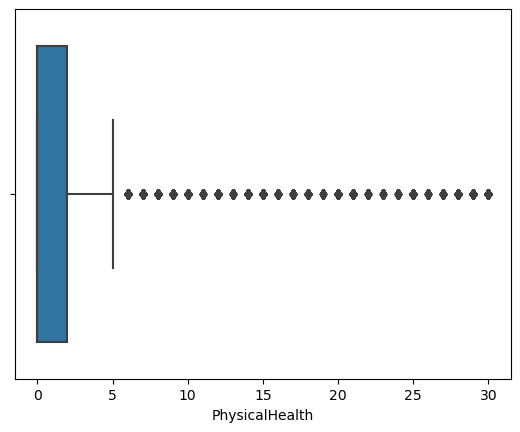

In [66]:
sns.boxplot(x=data["PhysicalHealth"])
plt.show()

In [67]:
data[data["BMI"]>45]["HeartDisease"].value_counts()

No     5564
Yes     694
Name: HeartDisease, dtype: int64

In [70]:
data[data["SleepTime"]>18]["HeartDisease"].value_counts()

No     387
Yes     83
Name: HeartDisease, dtype: int64

In [186]:
def wrangle(data):
    df = data.copy()
    
    mask_BMI = df["BMI"] < 45
    mask_ST = df["SleepTime"] < 18
    df_filtered = df[mask_BMI & mask_ST]
    
    return df_filtered
    

In [187]:
data_wrangled=wrangle(data)

In [75]:
data_wrangled.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


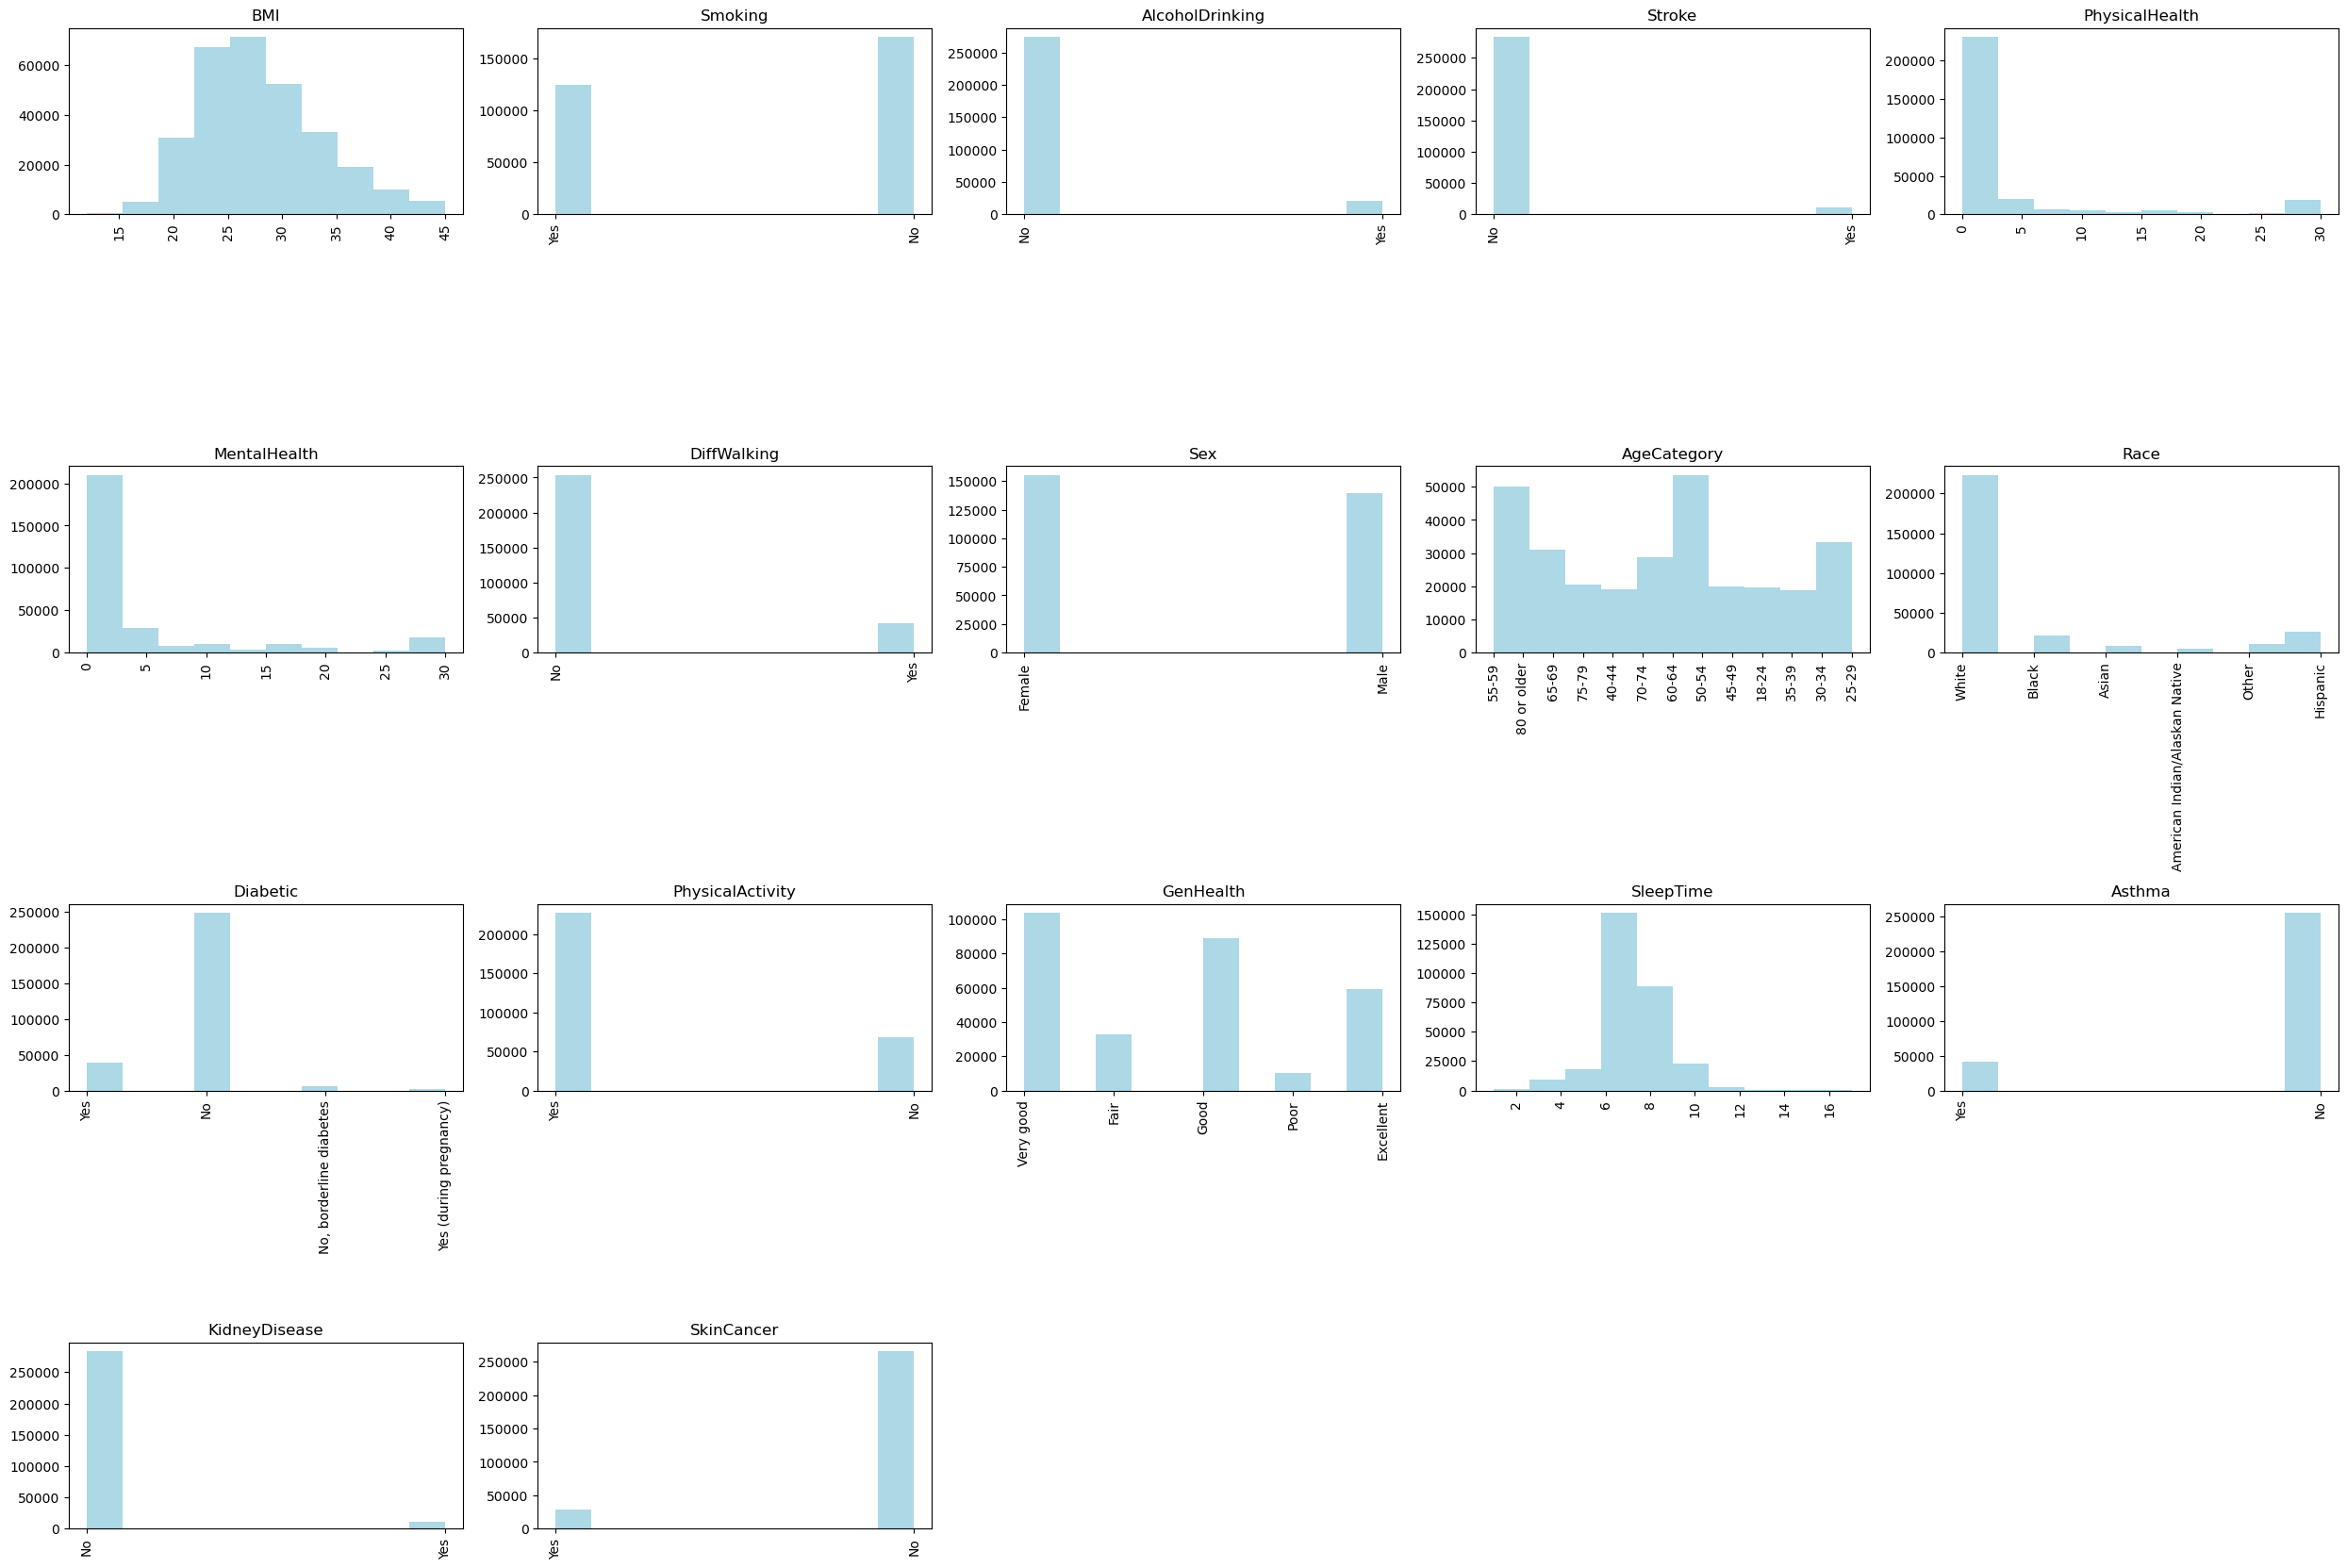

In [83]:
feature_cols = [x for x in data_wrangled.columns if x not in 'HeartDisease']
plt.figure(figsize=(25,35))
# loop for subplots
for i in range(len(feature_cols)):
    plt.subplot(8,5,i+1)
    plt.title(feature_cols[i])
    plt.xticks(rotation=90)
    plt.hist(data_wrangled[feature_cols[i]],color = "lightblue")
    
plt.tight_layout()
plt.show()

In [87]:
data.corr()

,BMI,PhysicalHealth,MentalHealth,SleepTime
BMI,1.000000,0.103813,0.056724,-0.048653
PhysicalHealth,0.103813,1.000000,0.279657,-0.058406
MentalHealth,0.056724,0.279657,1.000000,-0.117078
SleepTime,-0.048653,-0.058406,-0.117078,1.000000


In [89]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 301717 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      301717 non-null  object 
 1   BMI               301717 non-null  float64
 2   Smoking           301717 non-null  object 
 3   AlcoholDrinking   301717 non-null  object 
 4   Stroke            301717 non-null  object 
 5   PhysicalHealth    301717 non-null  float64
 6   MentalHealth      301717 non-null  float64
 7   DiffWalking       301717 non-null  object 
 8   Sex               301717 non-null  object 
 9   AgeCategory       301717 non-null  object 
 10  Race              301717 non-null  object 
 11  Diabetic          301717 non-null  object 
 12  PhysicalActivity  301717 non-null  object 
 13  GenHealth         301717 non-null  object 
 14  SleepTime         301717 non-null  float64
 15  Asthma            301717 non-null  object 
 16  KidneyDisease     30

In [99]:
features

['BMI',
 'Smoking',
 'AlcoholDrinking',
 'Stroke',
 'DiffWalking',
 'Sex',
 'AgeCategory',
 'Race',
 'Diabetic',
 'PhysicalActivity',
 'GenHealth',
 'Asthma',
 'KidneyDisease',
 'SkinCancer']

In [100]:
features = [x for x in data_wrangled.columns if x not in ['HeartDisease','BMI','SleepTime','MentalHealth',"PhysicalHealth"]]

In [ ]:
sns.countplot(data=data_wrangled,x=features[11],hue='HeartDisease',palette = ['deepskyblue','crimson'])
plt.show()

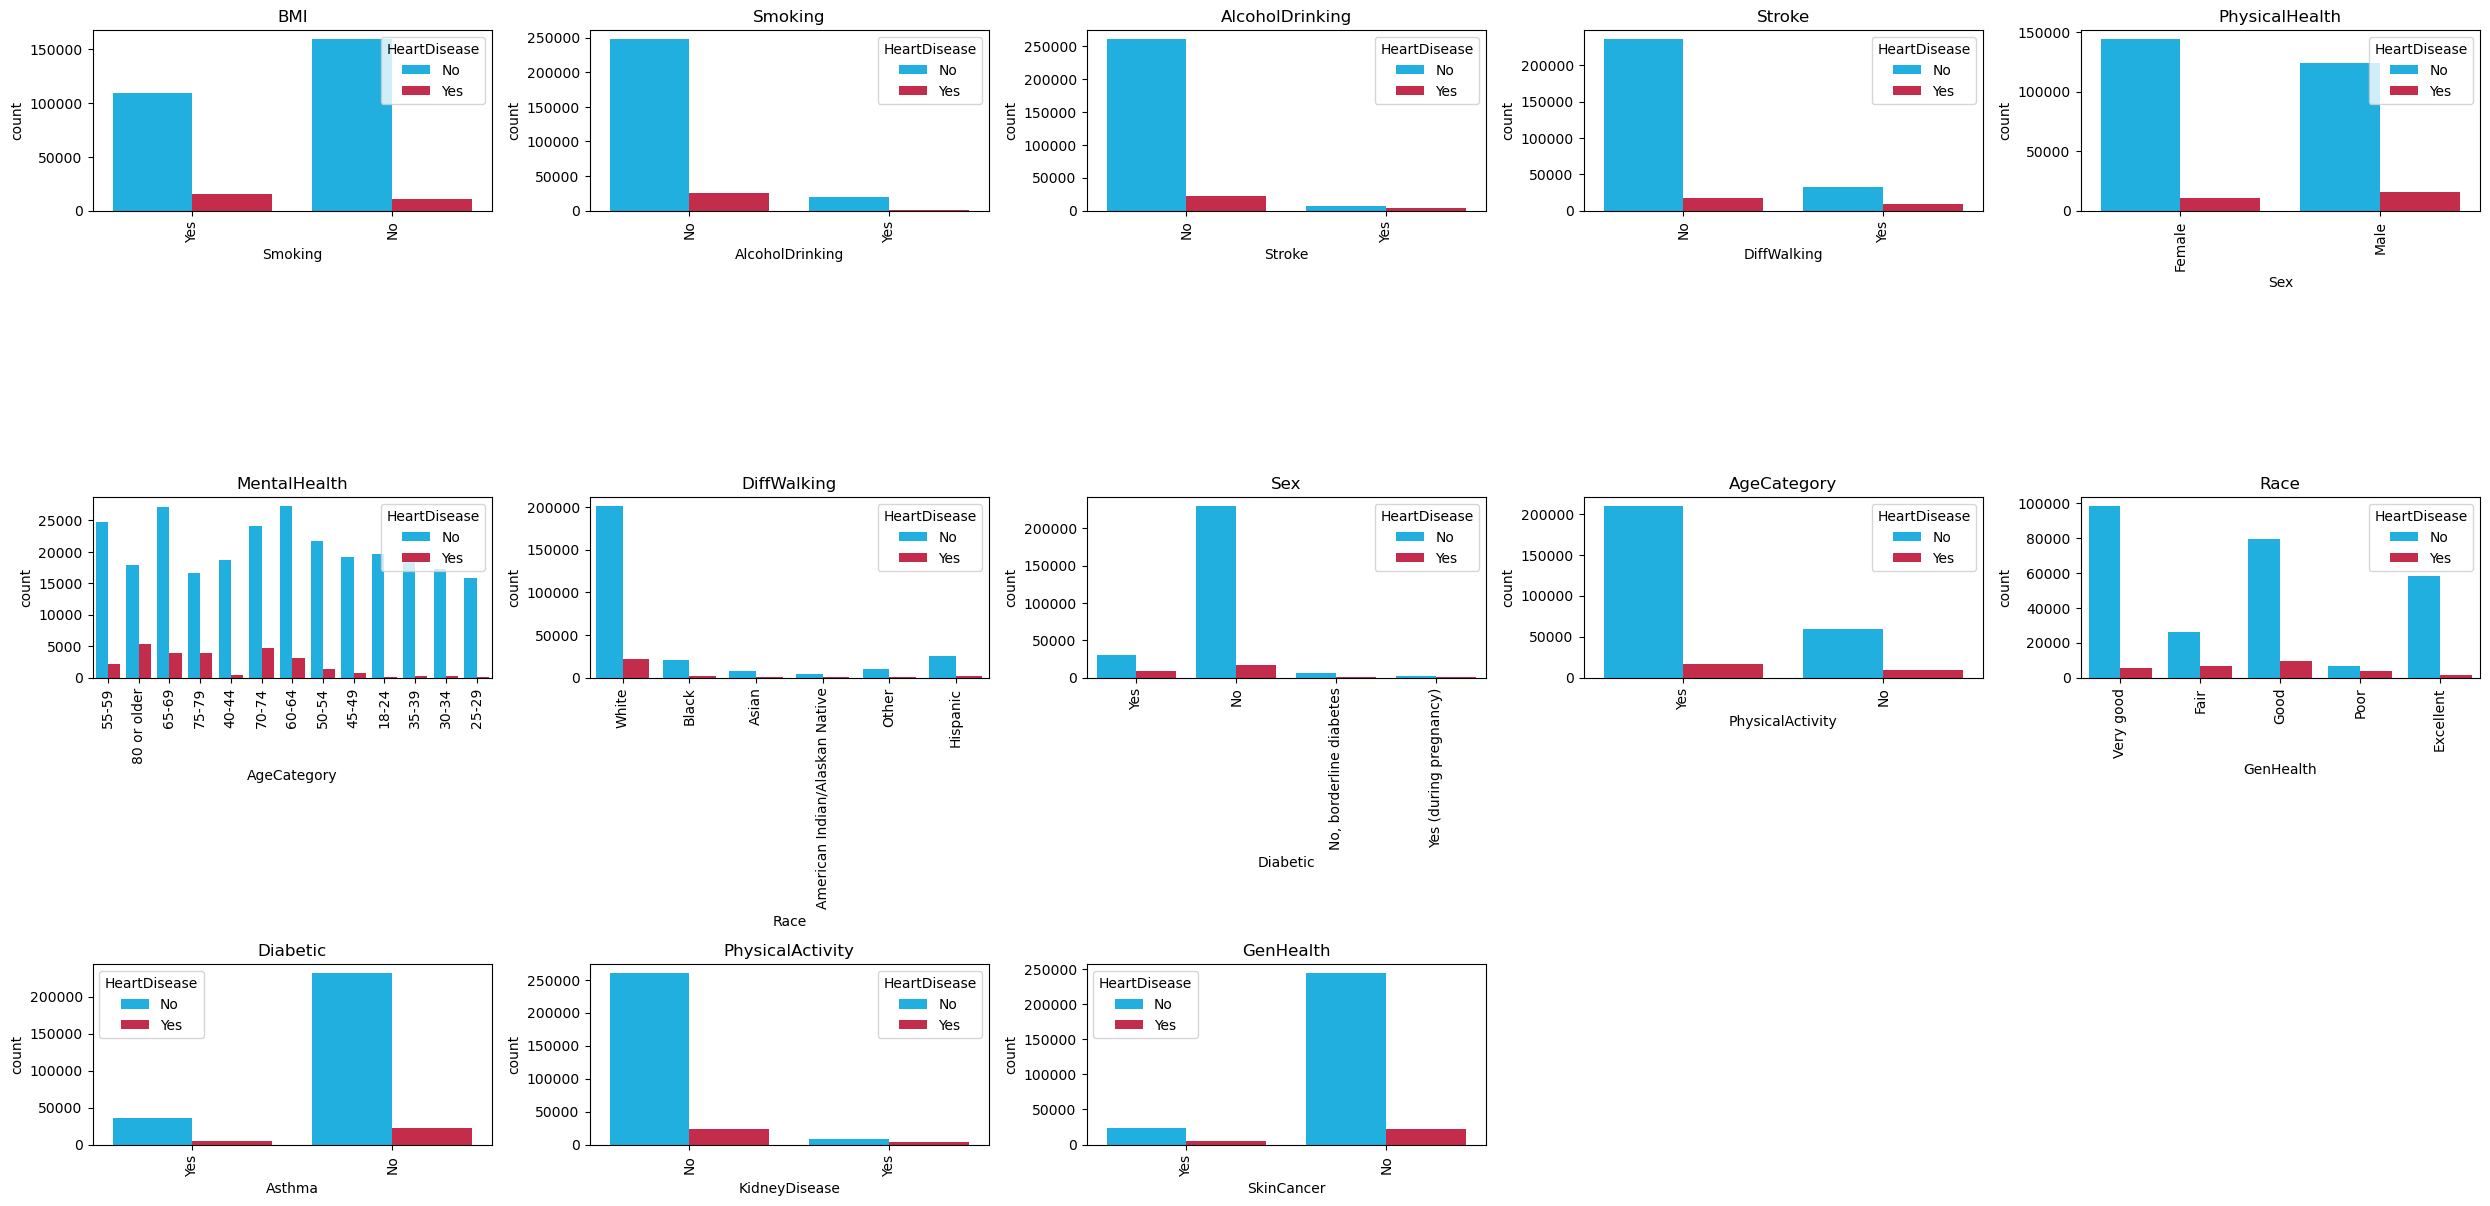

In [116]:
plt.figure(figsize=(25,35))
# loop for subplots
for i in range(len(features)):
    plt.subplot(8,5,i+1)
    plt.title(feature_cols[i])
    plt.xticks(rotation=90)
    sns.countplot(data=data_wrangled,x=features[i],hue='HeartDisease',palette = ['deepskyblue','crimson'])
    plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [133]:
float_columns = [x for x in data_wrangled.columns if x not in features]
float_columns=float_columns[1:]
float_columns

['BMI', 'PhysicalHealth', 'MentalHealth', 'SleepTime']

F:\Newfolder\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


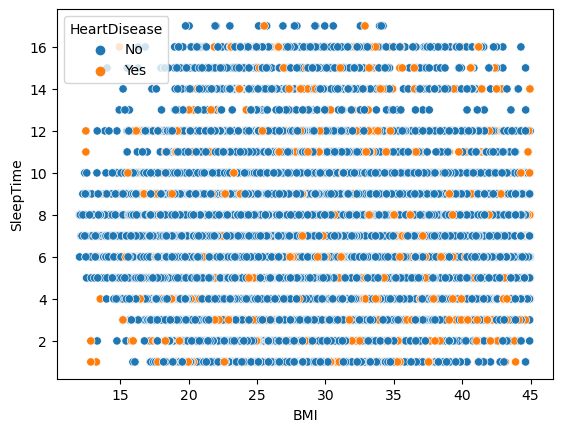

In [149]:
sns.scatterplot(x="BMI", y="SleepTime", data=data_wrangled,hue="HeartDisease")
plt.show()

F:\Newfolder\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


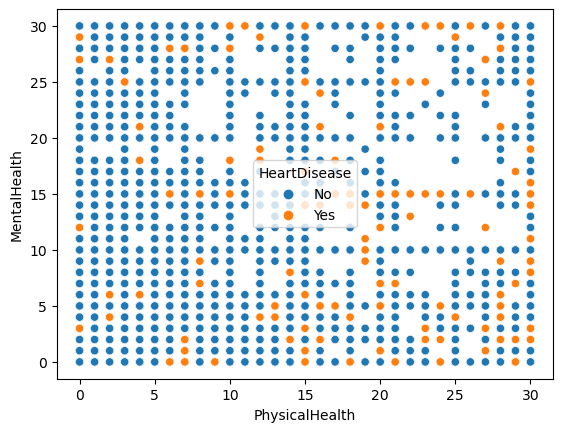

In [150]:
sns.scatterplot(x="PhysicalHealth", y="MentalHealth", data=data_wrangled,hue="HeartDisease")
plt.show()

F:\Newfolder\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


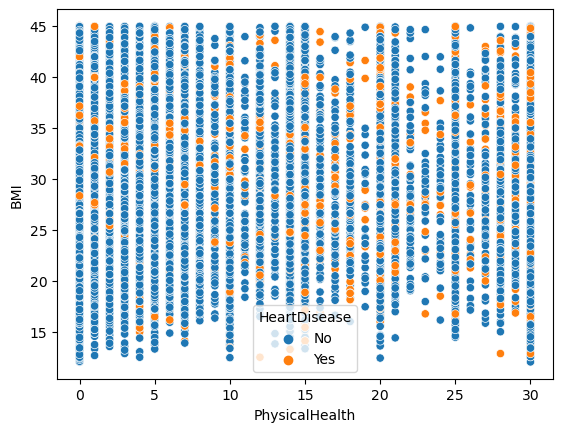

In [151]:
sns.scatterplot(x="PhysicalHealth", y="BMI", data=data_wrangled,hue="HeartDisease")
plt.show()

<Figure size 1200x500 with 0 Axes>

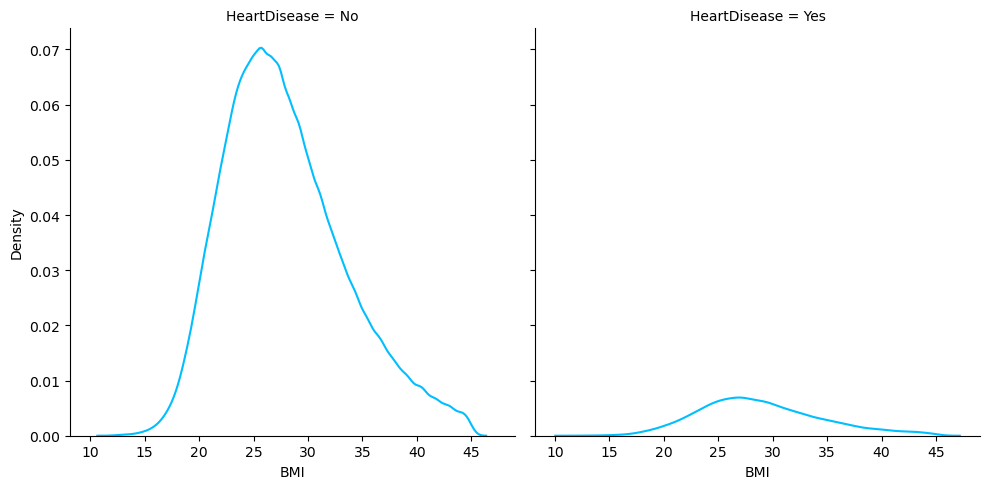

In [155]:
plt.figure(figsize=(12,5))
sns.displot(x='BMI', col='HeartDisease' , data = data_wrangled, kind="kde" ,color = 'deepskyblue');
plt.show()

<Figure size 1200x500 with 0 Axes>

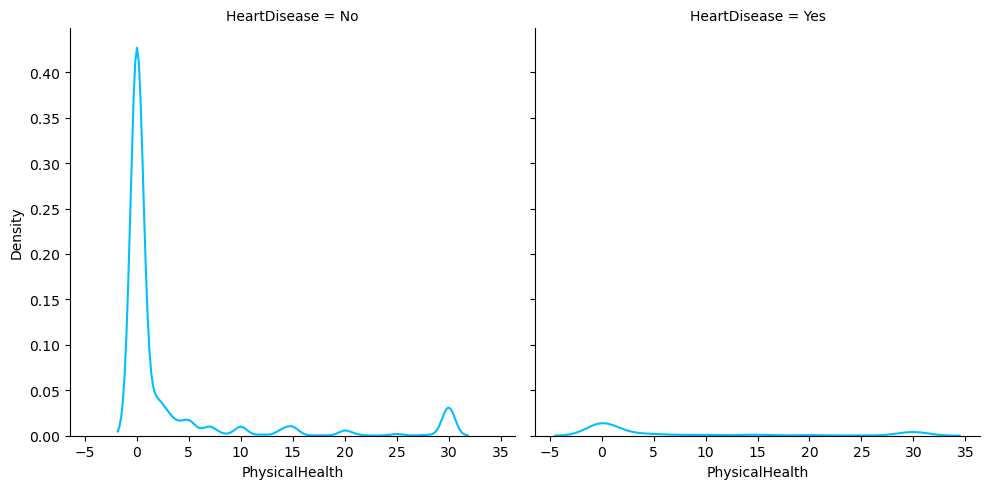

In [156]:
plt.figure(figsize=(12,5))
sns.displot(x='PhysicalHealth', col='HeartDisease' , data = data_wrangled, kind="kde" ,color = 'deepskyblue');
plt.show()

In [6]:
data_wrangled.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 313318 entries, 0 to 319793
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      313318 non-null  object 
 1   BMI               313318 non-null  float64
 2   Smoking           313318 non-null  object 
 3   AlcoholDrinking   313318 non-null  object 
 4   Stroke            313318 non-null  object 
 5   PhysicalHealth    313318 non-null  float64
 6   MentalHealth      313318 non-null  float64
 7   DiffWalking       313318 non-null  object 
 8   Sex               313318 non-null  object 
 9   AgeCategory       313318 non-null  object 
 10  Race              313318 non-null  object 
 11  Diabetic          313318 non-null  object 
 12  PhysicalActivity  313318 non-null  object 
 13  GenHealth         313318 non-null  object 
 14  SleepTime         313318 non-null  float64
 15  Asthma            313318 non-null  object 
 16  KidneyDisease     31

In [83]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.impute import SimpleImputer
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.tree import DecisionTreeClassifier


In [20]:
mask_has_heart=data_wrangled["HeartDisease"]=="Yes"

In [25]:
data_wrangled[mask_has_heart].describe()

,BMI,PhysicalHealth,MentalHealth,SleepTime
count,26633.000000,26633.000000,26633.000000,26633.000000
mean,28.841669,7.639845,4.524800,7.121053
std,5.579761,11.394262,9.066296,1.692177
min,12.210000,0.000000,0.000000,1.000000
25%,24.960000,0.000000,0.000000,6.000000
50%,28.190000,0.000000,0.000000,7.000000
75%,32.280000,14.000000,3.000000,8.000000
max,44.990000,30.000000,30.000000,17.000000


In [29]:
No_data=data_wrangled["HeartDisease"]=="No"
data_wrangled[No_data].describe()

,BMI,PhysicalHealth,MentalHealth,SleepTime
count,286685.000000,286685.000000,286685.000000,286685.000000
mean,27.786397,2.870269,3.763772,7.091780
std,5.475142,7.286178,7.757720,1.359041
min,12.020000,0.000000,0.000000,1.000000
25%,23.780000,0.000000,0.000000,6.000000
50%,27.120000,0.000000,0.000000,7.000000
75%,31.010000,1.000000,3.000000,8.000000
max,44.990000,30.000000,30.000000,17.000000


In [38]:
data_wrangled[mask_has_heart]["Stroke"].value_counts(normalize=True)

No     0.840161
Yes    0.159839
Name: Stroke, dtype: float64

In [66]:
data_wrangled[No_data]["Stroke"].value_counts(normalize=True)

No     0.97387
Yes    0.02613
Name: Stroke, dtype: float64

In [37]:
data_wrangled[mask_has_heart]["SkinCancer"].value_counts(normalize=True)

No     0.815267
Yes    0.184733
Name: SkinCancer, dtype: float64

In [69]:
data_wrangled[No_data]["SkinCancer"].value_counts(normalize=True)

No     0.914275
Yes    0.085725
Name: SkinCancer, dtype: float64

In [67]:
data_wrangled[mask_has_heart]["AlcoholDrinking"].value_counts(normalize=True)

No     0.958585
Yes    0.041415
Name: AlcoholDrinking, dtype: float64

In [68]:
data_wrangled[No_data]["AlcoholDrinking"].value_counts(normalize=True)

No     0.928793
Yes    0.071207
Name: AlcoholDrinking, dtype: float64

In [35]:
data_wrangled[mask_has_heart]["Smoking"].value_counts(normalize=True)

Yes    0.587091
No     0.412909
Name: Smoking, dtype: float64

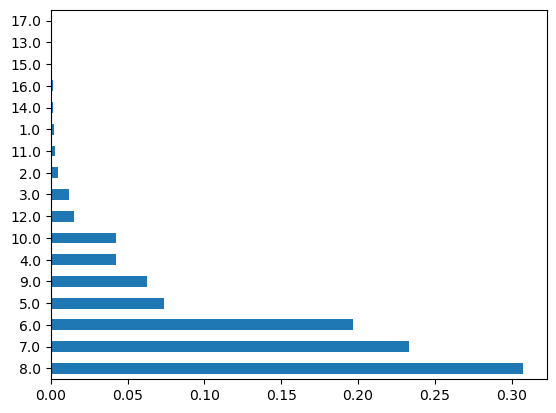

In [45]:
data_wrangled[mask_has_heart]["SleepTime"].value_counts(normalize=True).plot(kind="barh")
plt.show()

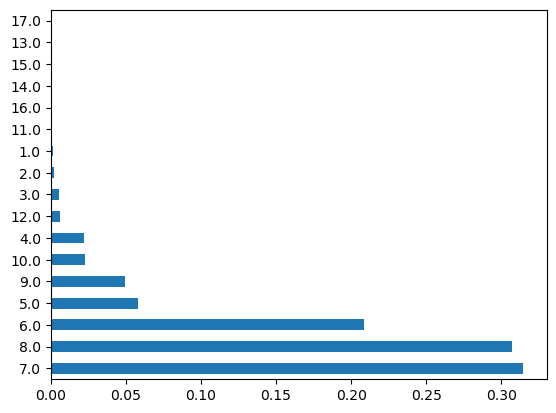

In [47]:
data_wrangled[No_data]["SleepTime"].value_counts(normalize=True).plot(kind="barh")
plt.show()

In [49]:
data_wrangled[mask_has_heart]["Diabetic"].value_counts(normalize=True)

No                         0.646792
Yes                        0.320692
No, borderline diabetes    0.028536
Yes (during pregnancy)     0.003980
Name: Diabetic, dtype: float64

In [50]:
data_wrangled[No_data]["Diabetic"].value_counts(normalize=True)

No                         0.865964
Yes                        0.105586
No, borderline diabetes    0.020179
Yes (during pregnancy)     0.008270
Name: Diabetic, dtype: float64

In [51]:
data_wrangled[mask_has_heart]["DiffWalking"].value_counts(normalize=True)

No     0.643675
Yes    0.356325
Name: DiffWalking, dtype: float64

In [52]:
data_wrangled[No_data]["DiffWalking"].value_counts(normalize=True)

No     0.887776
Yes    0.112224
Name: DiffWalking, dtype: float64

In [53]:
data_wrangled[mask_has_heart]["KidneyDisease"].value_counts(normalize=True)

No     0.876394
Yes    0.123606
Name: KidneyDisease, dtype: float64

In [54]:
data_wrangled[No_data]["KidneyDisease"].value_counts(normalize=True)

No     0.971945
Yes    0.028055
Name: KidneyDisease, dtype: float64

In [55]:
data_wrangled[mask_has_heart]["PhysicalActivity"].value_counts(normalize=True)

Yes    0.645853
No     0.354147
Name: PhysicalActivity, dtype: float64

In [56]:
data_wrangled[No_data]["PhysicalActivity"].value_counts(normalize=True)

Yes    0.793024
No     0.206976
Name: PhysicalActivity, dtype: float64

In [57]:
data_wrangled[mask_has_heart]["GenHealth"].value_counts(normalize=True)

Good         0.351669
Fair         0.256862
Very good    0.200390
Poor         0.135396
Excellent    0.055683
Name: GenHealth, dtype: float64

In [58]:
data_wrangled[No_data]["GenHealth"].value_counts(normalize=True)

Very good    0.374725
Good         0.283489
Excellent    0.226754
Fair         0.090964
Poor         0.024068
Name: GenHealth, dtype: float64

In [59]:
data_wrangled[mask_has_heart]["Sex"].value_counts(normalize=True)

Male      0.594113
Female    0.405887
Name: Sex, dtype: float64

In [60]:
data_wrangled[No_data]["Sex"].value_counts(normalize=True)

Female    0.532825
Male      0.467175
Name: Sex, dtype: float64

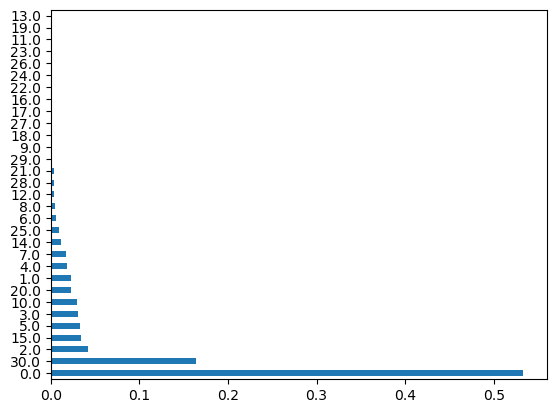

In [63]:
data_wrangled[mask_has_heart]["PhysicalHealth"].value_counts(normalize=True).plot(kind="barh")
plt.show()

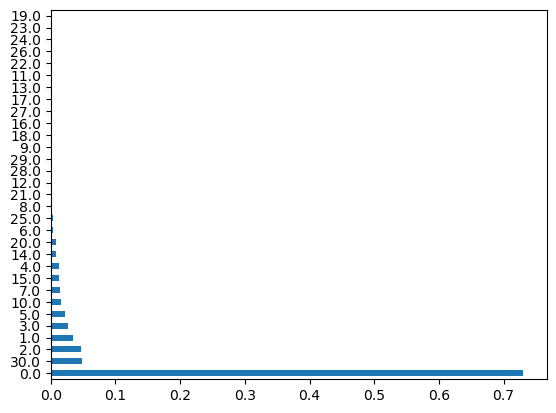

In [64]:
data_wrangled[No_data]["PhysicalHealth"].value_counts(normalize=True).plot(kind="barh")
plt.show()

In [65]:
data_wrangled.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 313318 entries, 0 to 319793
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      313318 non-null  object 
 1   BMI               313318 non-null  float64
 2   Smoking           313318 non-null  object 
 3   AlcoholDrinking   313318 non-null  object 
 4   Stroke            313318 non-null  object 
 5   PhysicalHealth    313318 non-null  float64
 6   MentalHealth      313318 non-null  float64
 7   DiffWalking       313318 non-null  object 
 8   Sex               313318 non-null  object 
 9   AgeCategory       313318 non-null  object 
 10  Race              313318 non-null  object 
 11  Diabetic          313318 non-null  object 
 12  PhysicalActivity  313318 non-null  object 
 13  GenHealth         313318 non-null  object 
 14  SleepTime         313318 non-null  float64
 15  Asthma            313318 non-null  object 
 16  KidneyDisease     31

In [78]:
data_wrangled[mask_has_heart]["MentalHealth"].value_counts(normalize=True).sort_values()

23.0    0.000075
19.0    0.000075
26.0    0.000150
13.0    0.000263
24.0    0.000300
17.0    0.000338
22.0    0.000338
27.0    0.000338
11.0    0.000413
16.0    0.000563
18.0    0.000601
9.0     0.000713
29.0    0.001352
21.0    0.001502
28.0    0.001952
12.0    0.002103
8.0     0.002591
6.0     0.003980
14.0    0.005219
25.0    0.006796
7.0     0.011565
4.0     0.011602
20.0    0.017159
1.0     0.022754
3.0     0.023918
10.0    0.029137
5.0     0.032216
15.0    0.032441
2.0     0.037622
30.0    0.081215
0.0     0.670709
Name: MentalHealth, dtype: float64

In [76]:
data_wrangled[No_data]["MentalHealth"].value_counts(normalize=True).sort_values()

19.0    0.000063
26.0    0.000181
24.0    0.000202
23.0    0.000216
11.0    0.000241
22.0    0.000300
13.0    0.000345
17.0    0.000398
27.0    0.000398
16.0    0.000460
9.0     0.000621
18.0    0.000656
29.0    0.000938
21.0    0.001053
28.0    0.001538
12.0    0.002344
8.0     0.003439
6.0     0.004723
25.0    0.005839
14.0    0.006439
20.0    0.016583
4.0     0.017245
7.0     0.017751
1.0     0.029813
15.0    0.030270
10.0    0.032879
3.0     0.033490
5.0     0.045105
30.0    0.050341
2.0     0.052877
0.0     0.643250
Name: MentalHealth, dtype: float64

In [72]:
data_wrangled[No_data]["Asthma"].value_counts(normalize=True)

No     0.872836
Yes    0.127164
Name: Asthma, dtype: float64

In [70]:
data_wrangled["Race"].value_counts(normalize=True)

White                             0.768583
Hispanic                          0.085597
Black                             0.070216
Other                             0.033863
Asian                             0.025654
American Indian/Alaskan Native    0.016086
Name: Race, dtype: float64

In [ ]:
Selected_features=data_wrangled["HeartDisease","Stroke","Diabetic","SkinCancer","Smoking","BMI","PhysicalActivity","PhysicalHealth"]

In [115]:
Selected_features=data_wrangled.drop(["AlcoholDrinking","Sex","Race","MentalHealth"],axis=1)
Selected_features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 313318 entries, 0 to 319793
Data columns (total 14 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      313318 non-null  object 
 1   BMI               313318 non-null  float64
 2   Smoking           313318 non-null  object 
 3   Stroke            313318 non-null  object 
 4   PhysicalHealth    313318 non-null  float64
 5   DiffWalking       313318 non-null  object 
 6   AgeCategory       313318 non-null  object 
 7   Diabetic          313318 non-null  object 
 8   PhysicalActivity  313318 non-null  object 
 9   GenHealth         313318 non-null  object 
 10  SleepTime         313318 non-null  float64
 11  Asthma            313318 non-null  object 
 12  KidneyDisease     313318 non-null  object 
 13  SkinCancer        313318 non-null  object 
dtypes: float64(3), object(11)
memory usage: 43.9+ MB


In [108]:
st_scaler=StandardScaler()
transformed_features=Selected_features


In [ ]:
transformed_features["BMI"]=st_scaler.fit_transform(transformed_features[["BMI"]])


In [96]:
transformed_features["PhysicalHealth"]=st_scaler.fit_transform(transformed_features[["PhysicalHealth"]])

In [97]:
transformed_features["SleepTime"]=st_scaler.fit_transform(transformed_features[["SleepTime"]])

In [109]:
transformed_features.describe()

,BMI,PhysicalHealth,SleepTime
count,3.133180e+05,3.133180e+05,3.133180e+05
mean,-2.276949e-15,3.084746e-14,-7.873405e-15
std,1.000002e+00,1.000002e+00,1.000002e+00
min,-2.887134e+00,-4.181086e-01,-4.382838e+00
25%,-7.221611e-01,-4.181086e-01,-7.869692e-01
50%,-1.231064e-01,-4.181086e-01,-6.779540e-02
75%,5.979443e-01,-1.628295e-01,6.513784e-01
max,3.116159e+00,3.411078e+00,7.123943e+00


In [86]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, QuantileTransformer, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

In [100]:
one_encoder=OneHotEncoder()
transformed_features["Diabetic"]=one_encoder.fit_transform(transformed_features[["Diabetic"]])

In [104]:
transformed_features.Diabetic.

0      (0, 2)\t1.0\n  (1, 0)\t1.0\n  (2, 2)\t1.0\n ...
1      (0, 2)\t1.0\n  (1, 0)\t1.0\n  (2, 2)\t1.0\n ...
2      (0, 2)\t1.0\n  (1, 0)\t1.0\n  (2, 2)\t1.0\n ...
3      (0, 2)\t1.0\n  (1, 0)\t1.0\n  (2, 2)\t1.0\n ...
4      (0, 2)\t1.0\n  (1, 0)\t1.0\n  (2, 2)\t1.0\n ...
Name: Diabetic, dtype: object

In [111]:
Selected_features.describe()

,BMI,PhysicalHealth,SleepTime
count,3.133180e+05,3.133180e+05,3.133180e+05
mean,-2.276949e-15,3.084746e-14,-7.873405e-15
std,1.000002e+00,1.000002e+00,1.000002e+00
min,-2.887134e+00,-4.181086e-01,-4.382838e+00
25%,-7.221611e-01,-4.181086e-01,-7.869692e-01
50%,-1.231064e-01,-4.181086e-01,-6.779540e-02
75%,5.979443e-01,-1.628295e-01,6.513784e-01
max,3.116159e+00,3.411078e+00,7.123943e+00


In [116]:
Selected_features.head()

,HeartDisease,BMI,Smoking,Stroke,PhysicalHealth,DiffWalking,AgeCategory,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,3.0,No,55-59,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,Yes,0.0,No,80 or older,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,20.0,No,65-69,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,0.0,No,75-79,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,28.0,Yes,40-44,No,Yes,Very good,8.0,No,No,No


In [114]:
data_wrangled.describe()

,BMI,PhysicalHealth,MentalHealth,SleepTime
count,313318.000000,313318.000000,313318.000000,313318.000000
mean,27.876099,3.275698,3.828462,7.094268
std,5.491994,7.834575,7.880253,1.390487
min,12.020000,0.000000,0.000000,1.000000
25%,23.910000,0.000000,0.000000,6.000000
50%,27.200000,0.000000,0.000000,7.000000
75%,31.160000,2.000000,3.000000,8.000000
max,44.990000,30.000000,30.000000,17.000000


In [118]:
X=Selected_features.drop(columns="HeartDisease")
y=Selected_features["HeartDisease"]

In [119]:
RUS=RandomUnderSampler(random_state=42)
X_RUS,y_RUS=RUS.fit_resample(X,y)

In [122]:
X_train,X_test,y_train,y_test=train_test_split(X_RUS,y_RUS,test_size=0.3,random_state=42)

In [123]:
X_val,X_ts,y_val,y_ts=train_test_split(X_test,y_test,test_size=0.5,random_state=42)

In [192]:
def train_evaluate_model(y_test):
    #fit the model instance 
    predictions = y_VAl_pred # calculate predictions

    #compute metrics for evaluation
    accuracy = accuracy_score(y_test, predictions)
    f1 = f1_score(y_test, predictions,pos_label="Yes")
    precision = precision_score(y_test, predictions,pos_label="Yes")
    recall = recall_score(y_test, predictions,pos_label="Yes")
    balanced_accuracy = balanced_accuracy_score(y_test, predictions)
    #auc = roc_auc_score(y_test, predictions)

    #create a dataframe to visualize the results
    eval_df = pd.DataFrame([[accuracy, f1, precision, recall, balanced_accuracy]], columns=['accuracy', 'f1_score', 'precision', 'recall', 'balanced_accuracy'])
    return eval_df

In [126]:
Selected_features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 313318 entries, 0 to 319793
Data columns (total 14 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      313318 non-null  object 
 1   BMI               313318 non-null  float64
 2   Smoking           313318 non-null  object 
 3   Stroke            313318 non-null  object 
 4   PhysicalHealth    313318 non-null  float64
 5   DiffWalking       313318 non-null  object 
 6   AgeCategory       313318 non-null  object 
 7   Diabetic          313318 non-null  object 
 8   PhysicalActivity  313318 non-null  object 
 9   GenHealth         313318 non-null  object 
 10  SleepTime         313318 non-null  float64
 11  Asthma            313318 non-null  object 
 12  KidneyDisease     313318 non-null  object 
 13  SkinCancer        313318 non-null  object 
dtypes: float64(3), object(11)
memory usage: 43.9+ MB


In [85]:
from sklearn.preprocessing import OrdinalEncoder

In [137]:
ordinal_columns=["AgeCategory","GenHealth"]
ordinal__transformer=Pipeline(steps=[
    ("Ord",OrdinalEncoder())])
one_hot_columns=["Diabetic"]
categorical_transformer=Pipeline(steps=
   [ ("One_Hot",OneHotEncoder())]
)

numerical_columns = ['PhysicalHealth', 'SleepTime', 'BMI',"MentalHealth"]
numerical_transformer=Pipeline(steps=[
    
    ('scaler', StandardScaler())
])
preprocessor = ColumnTransformer(
    transformers=[
        ('cat_one_hot', categorical_transformer, one_hot_columns),
        ("cat_ordinal",ordinal__transformer,ordinal_columns),
        ('num', numerical_transformer, numerical_columns)
    ])

In [138]:
RF_classifier = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ("calsifier",RandomForestClassifier(
        oob_score=True, 
        random_state=42, 
        warm_start=True,
        n_jobs=-1,
        n_estimators=400,
        max_depth=
                          )
)
])

In [139]:
RF_classifier.fit(X_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat_one_hot',
                                                  Pipeline(steps=[('One_Hot',
                                                                   OneHotEncoder())]),
                                                  ['Diabetic']),
                                                 ('cat_ordinal',
                                                  Pipeline(steps=[('Ord',
                                                                   OrdinalEncoder())]),
                                                  ['AgeCategory', 'GenHealth']),
                                                 ('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['PhysicalHealth',
                                                   'SleepTime', 'BMI'])])),
                ('calsifier',
                 RandomForestClassifier(n_estimators=400, n_jobs=-1,
                                        oob_score=True, random_state=42,
                                        warm_start=True))])

In [157]:
from sklearn.datasets import make_classification
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import classification_report

In [155]:
RF_V_predictions=  RF_classifier.predict(X_val)

In [157]:
recall = recall_score(y_val, RF_classifier.predict(X_val), pos_label='Yes')
recall

0.7127553562531141

In [152]:
from sklearn.metrics import (
    ConfusionMatrixDisplay,
    classification_report,
    confusion_matrix,
)



In [165]:
rfc = RandomForestClassifier(random_state=42,
                             
                             oob_score=True, 
                             warm_start=True,
                             n_jobs=-1)

param_grid_RF = {
    'n_estimators': [100, 200, 300,400,500],
    'max_depth': [5, 10, 15,20]}

        

# perform grid search to find the best hyperparameters
grid_search = GridSearchCV(rfc, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_Prep,y_train)

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(n_jobs=-1, oob_score=True,
                                              random_state=42,
                                              warm_start=True),
             param_grid={'max_depth': [5, 10, 15, 20],
                         'n_estimators': [100, 200, 300, 400, 500]},
             scoring='accuracy')

In [173]:
recall = recall_score(y_val, grid_search.predict(X_V_p), pos_label='Yes')


In [177]:
recall

0.8226208271051321

In [174]:
print("Best hyperparameters:", grid_search.best_params_)


Best hyperparameters: {'max_depth': 10, 'n_estimators': 200}


In [175]:
Xprep=preprocessor.fit(X)
X_V_p=Xprep.transform(X_val)

In [199]:
y_VAl_pred =grid_search.predict(X_V_p)

In [194]:
results = train_evaluate_model(y_val)
results

,accuracy,f1_score,precision,recall,balanced_accuracy
0,0.737547,0.758993,0.704502,0.822621,0.73714


In [ ]:
results = train_evaluate_model(y_test)
results.index = ['K Nearest Neighbors - Method 1']
results.style.background_gradient(cmap = sns.color_palette("blend:green,red", as_cmap=True))

In [197]:
gbc=GradientBoostingClassifier(random_state=42)

In [203]:
param_grid_GBC = {
    'n_estimators': [50, 100],
    'learning_rate': [ 0.1],
    'max_depth': [5],
    'min_samples_split': [ 10,15],
    'min_samples_leaf': [5]
}

# perform grid search to find the best hyperparameters
grid_search = GridSearchCV(gbc, param_grid_GBC, cv=5, scoring='accuracy')
grid_search.fit(X_Prep, y_train)

# print the best hyperparameters and the corresponding performance
print("Best hyperparameters:", grid_search.best_params_)
y_pred = grid_search.predict(X_V_p)

Best hyperparameters: {'learning_rate': 0.1, 'max_depth': 5, 'min_samples_leaf': 5, 'min_samples_split': 10, 'n_estimators': 100}


In [204]:
resultsGBC = train_evaluate_model(y_val)
resultsGBC.index=["GRadient boosting"]
results=results.append(resultsGBC)

In [205]:
results

,accuracy,f1_score,precision,recall,balanced_accuracy
0,0.737547,0.758993,0.704502,0.822621,0.737140
GRadient boosting,0.740926,0.760915,0.709302,0.820628,0.740545
GRadient boosting,0.740926,0.760915,0.709302,0.820628,0.740545


In [206]:
param_grid = {'n_neighbors': [1,3,5,7,9,11,13,15,17,19],  #odd numbers because there are 2 classes in target coulmn
              'weights': ['distance', 'uniform']}  
gridKNN = GridSearchCV(KNeighborsClassifier(), param_grid, refit = True, verbose = 3)
  
# fitting the model for grid search
gridKNN.fit(X_Prep, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV 1/5] END ...n_neighbors=1, weights=distance;, score=0.672 total time=   1.2s
[CV 2/5] END ...n_neighbors=1, weights=distance;, score=0.661 total time=   0.1s
[CV 3/5] END ...n_neighbors=1, weights=distance;, score=0.663 total time=   0.1s
[CV 4/5] END ...n_neighbors=1, weights=distance;, score=0.663 total time=   0.1s
[CV 5/5] END ...n_neighbors=1, weights=distance;, score=0.664 total time=   0.1s
[CV 1/5] END ....n_neighbors=1, weights=uniform;, score=0.672 total time=   0.3s
[CV 2/5] END ....n_neighbors=1, weights=uniform;, score=0.661 total time=   0.3s
[CV 3/5] END ....n_neighbors=1, weights=uniform;, score=0.663 total time=   0.3s
[CV 4/5] END ....n_neighbors=1, weights=uniform;, score=0.663 total time=   0.3s
[CV 5/5] END ....n_neighbors=1, weights=uniform;, score=0.664 total time=   0.3s
[CV 1/5] END ...n_neighbors=3, weights=distance;, score=0.682 total time=   0.2s
[CV 2/5] END ...n_neighbors=3, weights=distance

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19],
                         'weights': ['distance', 'uniform']},
             verbose=3)

In [213]:
resultsKNN = train_evaluate_model(y_val)
resultsKNN.index=["KNN_real "]
results=results.append(resultsKNN)

In [214]:
results

,accuracy,f1_score,precision,recall,balanced_accuracy
0,0.737547,0.758993,0.704502,0.822621,0.737140
GRadient boosting,0.740926,0.760915,0.709302,0.820628,0.740545
GRadient boosting,0.740926,0.760915,0.709302,0.820628,0.740545
KNN,0.740926,0.760915,0.709302,0.820628,0.740545
KNN,0.740926,0.760915,0.709302,0.820628,0.740545
KNN_real,0.741427,0.760713,0.710823,0.818137,0.741060


In [212]:
y_VAl_pred = grid_search.predict(X_V_p)

In [215]:
results.drop_duplicates()

,accuracy,f1_score,precision,recall,balanced_accuracy
0,0.737547,0.758993,0.704502,0.822621,0.737140
GRadient boosting,0.740926,0.760915,0.709302,0.820628,0.740545
KNN_real,0.741427,0.760713,0.710823,0.818137,0.741060


In [219]:
new_Selected_features=data_wrangled.drop(["Race"],axis=1)


In [220]:
ordinal_columns=["AgeCategory","GenHealth"]
ordinal__transformer=Pipeline(steps=[
    ("Ord",OrdinalEncoder())])
one_hot_columns=["Diabetic"]
categorical_transformer=Pipeline(steps=
   [ ("One_Hot",OneHotEncoder())]
)

numerical_columns = ['PhysicalHealth', 'SleepTime', 'BMI',"MentalHealth"]
numerical_transformer=Pipeline(steps=[
    
    ('scaler', StandardScaler())
])
preprocessor = ColumnTransformer(
    transformers=[
        ('cat_one_hot', categorical_transformer, one_hot_columns),
        ("cat_ordinal",ordinal__transformer,ordinal_columns),
        ('num', numerical_transformer, numerical_columns)
    ])

In [102]:
data1=data_wrangled.copy()

In [103]:
data1["AgeCategory"].unique()

array(['55-59', '80 or older', '65-69', '75-79', '40-44', '70-74',
       '60-64', '50-54', '45-49', '18-24', '35-39', '30-34', '25-29'],
      dtype=object)

In [104]:
AGE_dict={
    '18-24':1,
    '25-29':2,
    '30-34':3,
    '35-39':4,
    '40-44':5,
    '45-49':6,
    '50-54':7,
    '55-59':8,
    '60-64':9,
    '65-69':10,
    '70-74':11,
    '75-79':12,
    '80 or older':13  
    
}
data1["AgeCategory"].replace(AGE_dict,inplace=True)
data1["AgeCategory"].unique()

array([ 8, 13, 10, 12,  5, 11,  9,  7,  6,  1,  4,  3,  2], dtype=int64)

In [105]:
TF_dict={
    "Yes":1,
    "No":0
}
data1['AlcoholDrinking'].replace(TF_dict,inplace=True)
data1['KidneyDisease'].replace(TF_dict,inplace=True)
data1['Asthma'].replace(TF_dict,inplace=True)
data1['HeartDisease'].replace(TF_dict,inplace=True)
data1['PhysicalActivity'].replace(TF_dict,inplace=True)
data1['DiffWalking'].replace(TF_dict,inplace=True)
data1['Smoking'].replace(TF_dict,inplace=True)
data1['Stroke'].replace(TF_dict,inplace=True)
data1['SkinCancer'].replace(TF_dict,inplace=True)


In [106]:
sex_dict={
    "Female":0,
    "Male":1
}
data1["Sex"].replace(sex_dict,inplace=True)

In [101]:
data1

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,-2.053192,1,0,0,-0.035190,3.321160,0,0,0.131035,"(0, 5)\t1.0\n (1, 5)\t1.0\n (2, 5)\t1.0\n ...","(0, 2)\t1.0\n (1, 0)\t1.0\n (2, 2)\t1.0\n ...",1,3,-1.506143,1,0,1
1,0,-1.372199,0,0,1,-0.418109,-0.485831,0,0,1.530232,"(0, 5)\t1.0\n (1, 5)\t1.0\n (2, 5)\t1.0\n ...","(0, 2)\t1.0\n (1, 0)\t1.0\n (2, 2)\t1.0\n ...",1,3,-0.067795,0,0,0
2,0,-0.235998,1,0,0,2.134682,3.321160,0,1,0.690714,"(0, 5)\t1.0\n (1, 5)\t1.0\n (2, 5)\t1.0\n ...","(0, 2)\t1.0\n (1, 0)\t1.0\n (2, 2)\t1.0\n ...",1,1,0.651378,1,0,0
3,0,-0.667536,0,0,0,-0.418109,-0.485831,0,0,1.250393,"(0, 5)\t1.0\n (1, 5)\t1.0\n (2, 5)\t1.0\n ...","(0, 2)\t1.0\n (1, 0)\t1.0\n (2, 2)\t1.0\n ...",0,2,-0.786969,0,0,1
4,0,-0.758578,0,0,0,3.155799,-0.485831,1,0,-0.708484,"(0, 5)\t1.0\n (1, 5)\t1.0\n (2, 5)\t1.0\n ...","(0, 2)\t1.0\n (1, 0)\t1.0\n (2, 2)\t1.0\n ...",1,3,0.651378,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319789,0,-1.029882,0,0,0,-0.418109,-0.485831,0,0,-1.827842,"(0, 5)\t1.0\n (1, 5)\t1.0\n (2, 5)\t1.0\n ...","(0, 2)\t1.0\n (1, 0)\t1.0\n (2, 2)\t1.0\n ...",1,5,0.651378,0,0,0
319790,1,-0.084869,1,0,0,0.475368,-0.485831,1,1,0.410874,"(0, 5)\t1.0\n (1, 5)\t1.0\n (2, 5)\t1.0\n ...","(0, 2)\t1.0\n (1, 0)\t1.0\n (2, 2)\t1.0\n ...",0,1,-0.786969,1,0,0
319791,0,0.357594,1,0,0,-0.418109,-0.485831,0,1,-0.988323,"(0, 5)\t1.0\n (1, 5)\t1.0\n (2, 5)\t1.0\n ...","(0, 2)\t1.0\n (1, 0)\t1.0\n (2, 2)\t1.0\n ...",1,3,-1.506143,1,0,0
319792,0,-0.662074,0,0,0,-0.418109,-0.485831,0,0,-0.428644,"(0, 5)\t1.0\n (1, 5)\t1.0\n (2, 5)\t1.0\n ...","(0, 2)\t1.0\n (1, 0)\t1.0\n (2, 2)\t1.0\n ...",1,2,-0.786969,0,0,0


In [29]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 313318 entries, 0 to 319793
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      313318 non-null  int64  
 1   BMI               313318 non-null  float64
 2   Smoking           313318 non-null  int64  
 3   AlcoholDrinking   313318 non-null  int64  
 4   Stroke            313318 non-null  int64  
 5   PhysicalHealth    313318 non-null  float64
 6   MentalHealth      313318 non-null  float64
 7   DiffWalking       313318 non-null  int64  
 8   Sex               313318 non-null  object 
 9   AgeCategory       313318 non-null  int64  
 10  Race              313318 non-null  object 
 11  Diabetic          313318 non-null  object 
 12  PhysicalActivity  313318 non-null  int64  
 13  GenHealth         313318 non-null  object 
 14  SleepTime         313318 non-null  float64
 15  Asthma            313318 non-null  int64  
 16  KidneyDisease     31

In [ ]:
sex_dict

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,...,Race_American Indian/Alaskan Native,Race_Asian,Race_Black,Race_Hispanic,Race_Other,Race_White,Diabetic_No,"Diabetic_No, borderline diabetes",Diabetic_Yes,Diabetic_Yes (during pregnancy)
0,0,16.60,1,0,0,3.0,30.0,0,Female,8,...,0,0,0,0,0,1,0,0,1,0
1,0,20.34,0,0,1,0.0,0.0,0,Female,13,...,0,0,0,0,0,1,1,0,0,0
2,0,26.58,1,0,0,20.0,30.0,0,Male,10,...,0,0,0,0,0,1,0,0,1,0
3,0,24.21,0,0,0,0.0,0.0,0,Female,12,...,0,0,0,0,0,1,1,0,0,0
4,0,23.71,0,0,0,28.0,0.0,1,Female,5,...,0,0,0,0,0,1,1,0,0,0


In [107]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

In [108]:
St_Scaler=StandardScaler()
data1["AgeCategory"]=St_Scaler.fit_transform(data1[["AgeCategory"]])

In [109]:
data1["PhysicalHealth"]=St_Scaler.fit_transform(data1[["PhysicalHealth"]])
data1["MentalHealth"]=St_Scaler.fit_transform(data1[["MentalHealth"]])
data1["SleepTime"]=St_Scaler.fit_transform(data1[["SleepTime"]])


In [110]:
data1["BMI"]=St_Scaler.fit_transform(data1[["BMI"]])


In [51]:
data1["GenHealth"].unique()

array(['Very good', 'Fair', 'Good', 'Poor', 'Excellent'], dtype=object)

In [111]:
hlth_dict={
    'Very good':3,
    'Fair':1,
    'Good':2,
    'Poor':0,
    'Excellent':5
}
data1["GenHealth"].replace(hlth_dict,inplace=True)

In [112]:
data1

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,-2.053192,1,0,0,-0.035190,3.321160,0,0,0.131035,White,Yes,1,3,-1.506143,1,0,1
1,0,-1.372199,0,0,1,-0.418109,-0.485831,0,0,1.530232,White,No,1,3,-0.067795,0,0,0
2,0,-0.235998,1,0,0,2.134682,3.321160,0,1,0.690714,White,Yes,1,1,0.651378,1,0,0
3,0,-0.667536,0,0,0,-0.418109,-0.485831,0,0,1.250393,White,No,0,2,-0.786969,0,0,1
4,0,-0.758578,0,0,0,3.155799,-0.485831,1,0,-0.708484,White,No,1,3,0.651378,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319789,0,-1.029882,0,0,0,-0.418109,-0.485831,0,0,-1.827842,Hispanic,No,1,5,0.651378,0,0,0
319790,1,-0.084869,1,0,0,0.475368,-0.485831,1,1,0.410874,Hispanic,Yes,0,1,-0.786969,1,0,0
319791,0,0.357594,1,0,0,-0.418109,-0.485831,0,1,-0.988323,Hispanic,No,1,3,-1.506143,1,0,0
319792,0,-0.662074,0,0,0,-0.418109,-0.485831,0,0,-0.428644,Hispanic,No,1,2,-0.786969,0,0,0


In [113]:
one_hot_encode_cols

['Race', 'Diabetic']

In [114]:
for col in one_hot_encode_cols:
    data1[col] = pd.Categorical(data1[col])
# Do the one hot encoding
data1 = pd.get_dummies(data1, columns=one_hot_encode_cols)
data1.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,...,Race_American Indian/Alaskan Native,Race_Asian,Race_Black,Race_Hispanic,Race_Other,Race_White,Diabetic_No,"Diabetic_No, borderline diabetes",Diabetic_Yes,Diabetic_Yes (during pregnancy)
0,0,-2.053192,1,0,0,-0.035190,3.321160,0,0,0.131035,...,0,0,0,0,0,1,0,0,1,0
1,0,-1.372199,0,0,1,-0.418109,-0.485831,0,0,1.530232,...,0,0,0,0,0,1,1,0,0,0
2,0,-0.235998,1,0,0,2.134682,3.321160,0,1,0.690714,...,0,0,0,0,0,1,0,0,1,0
3,0,-0.667536,0,0,0,-0.418109,-0.485831,0,0,1.250393,...,0,0,0,0,0,1,1,0,0,0
4,0,-0.758578,0,0,0,3.155799,-0.485831,1,0,-0.708484,...,0,0,0,0,0,1,1,0,0,0


In [148]:
data1.dtypes

HeartDisease                              bool
BMI                                    float64
Smoking                                   bool
AlcoholDrinking                           bool
Stroke                                    bool
PhysicalHealth                         float64
MentalHealth                           float64
DiffWalking                               bool
Sex                                       bool
AgeCategory                            float64
PhysicalActivity                          bool
GenHealth                                int64
SleepTime                              float64
Asthma                                    bool
KidneyDisease                             bool
SkinCancer                                bool
Race_American Indian/Alaskan Native       bool
Race_Asian                                bool
Race_Black                                bool
Race_Hispanic                             bool
Race_Other                                bool
Race_White   

In [147]:
data1[cols]=data1[cols].astype(bool)


In [146]:
cols=['HeartDisease',"Smoking",'Asthma',
 'KidneyDisease',
 'SkinCancer','PhysicalActivity','DiffWalking',
 'Sex',"AlcoholDrinking","Stroke"]

In [149]:
RUS=RandomUnderSampler(random_state=42)


In [173]:
X=data1.drop(columns="HeartDisease")
y=data1["HeartDisease"]

In [174]:
X_under_sampled,y_under_sampled=RUS.fit_resample(X,y)

In [175]:
X_train_new,X_VT,y_train_new,y_VT=train_test_split(X_under_sampled,y_under_sampled,test_size=0.3,random_state=42)

In [176]:
X_Vlaidate_new,X_Test_new,y_Validate_new,y_Test_new=train_test_split(X_VT,y_VT,test_size=0.5,random_state=42)

In [177]:
data1.dtypes

HeartDisease                              bool
BMI                                    float64
Smoking                                   bool
AlcoholDrinking                           bool
Stroke                                    bool
PhysicalHealth                         float64
MentalHealth                           float64
DiffWalking                               bool
Sex                                       bool
AgeCategory                            float64
PhysicalActivity                          bool
GenHealth                                int64
SleepTime                              float64
Asthma                                    bool
KidneyDisease                             bool
SkinCancer                                bool
Race_American Indian/Alaskan Native       bool
Race_Asian                                bool
Race_Black                                bool
Race_Hispanic                             bool
Race_Other                                bool
Race_White   

In [178]:
gb = GradientBoostingClassifier()
gb.fit(X_train_new,y_train_new)

GradientBoostingClassifier()

In [179]:
predictions_XGB=gb.predict(X_Vlaidate_new)

In [180]:
report_XGB=classification_report(y_Validate_new,predictions_XGB)

In [162]:
%recall

'              precision    recall  f1-score   support\n\n       False       0.79      0.72      0.75      3976\n        True       0.74      0.81      0.78      4014\n\n    accuracy                           0.77      7990\n   macro avg       0.77      0.76      0.76      7990\nweighted avg       0.77      0.77      0.76      7990\n'

In [163]:
from sklearn.metrics import recall_score

In [164]:
recal_XGB=recall_score(y_Validate_new,predictions_XGB)

In [165]:
recal_XGB

0.8106626806178375

In [181]:
importances=gb .feature_importances_
feature_dict = dict(zip(data1.columns.to_list(), importances))


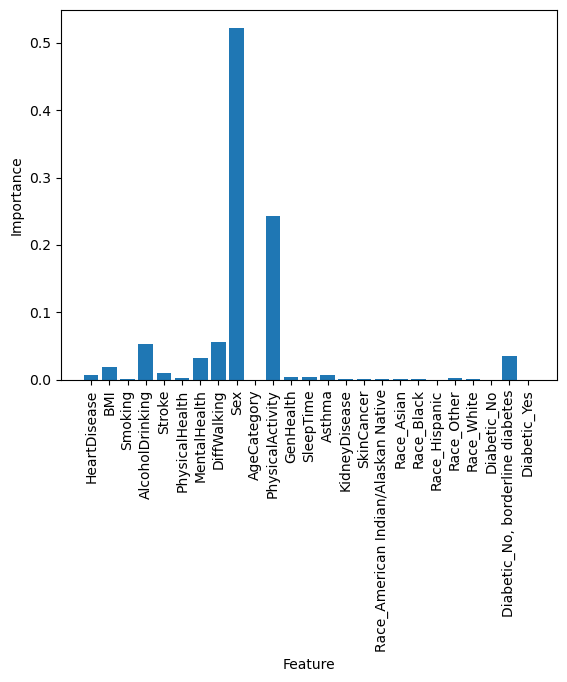

In [182]:

plt.bar(feature_dict.keys(), feature_dict.values())
plt.xticks(rotation=90)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.show()

### Drop less important features

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,...,Race_American Indian/Alaskan Native,Race_Asian,Race_Black,Race_Hispanic,Race_Other,Race_White,Diabetic_No,"Diabetic_No, borderline diabetes",Diabetic_Yes,Diabetic_Yes (during pregnancy)
0,False,-2.053192,True,False,False,-0.035190,3.321160,False,False,0.131035,...,False,False,False,False,False,True,False,False,True,False
1,False,-1.372199,False,False,True,-0.418109,-0.485831,False,False,1.530232,...,False,False,False,False,False,True,True,False,False,False
2,False,-0.235998,True,False,False,2.134682,3.321160,False,True,0.690714,...,False,False,False,False,False,True,False,False,True,False
3,False,-0.667536,False,False,False,-0.418109,-0.485831,False,False,1.250393,...,False,False,False,False,False,True,True,False,False,False
4,False,-0.758578,False,False,False,3.155799,-0.485831,True,False,-0.708484,...,False,False,False,False,False,True,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319789,False,-1.029882,False,False,False,-0.418109,-0.485831,False,False,-1.827842,...,False,False,False,True,False,False,True,False,False,False
319790,True,-0.084869,True,False,False,0.475368,-0.485831,True,True,0.410874,...,False,False,False,True,False,False,False,False,True,False
319791,False,0.357594,True,False,False,-0.418109,-0.485831,False,True,-0.988323,...,False,False,False,True,False,False,True,False,False,False
319792,False,-0.662074,False,False,False,-0.418109,-0.485831,False,False,-0.428644,...,False,False,False,True,False,False,True,False,False,False
